# Notebook 6: High Res Young Stars

This notebook will  be exploring the young stars in the h329 galaxy at the present day redshift.

## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter (walked through in Notebook 2)

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)

## Filtered disk of h329
## h329_s_disk = h329.s[f_disk]
## Do not want to run the filtered galaxy above yet because the goal of this notebook is to add another filter and analyze as well

## Filtering for Age

Generic filter classes work like band-pass filters.

In [5]:
young_4 = pynbody.filt.LowPass('age', '4 Gyr')
young_10 = pynbody.filt.LowPass('age', '10 Gyr')

Now we have to combine this filter with our previous disk filter to get h329 filtered by star age.

In [6]:
h329_s_disk = h329.s[f_disk & young_4] ## main young star age I want to check

h329_s_disk_older = h329.s[f_disk & young_10] ## this filter combo includes all stars less than 10 gyr so larger population here

Now again we must set up our main profile and vertical profile:

In [7]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01) ## radial profile

## Background

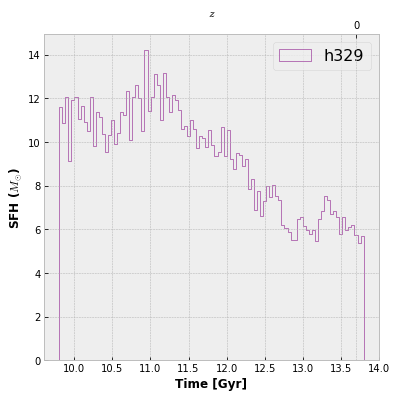

In [8]:
## Young stars from about 4 Gyr ago and younger = greater than 10 Gyr on the star formation history of the galaxy

fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_disk,bins=100, color='purple', label = 'h329')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFH ($M_{\odot}$)', fontweight='bold')
plt.tick_params(axis='both', which='major')

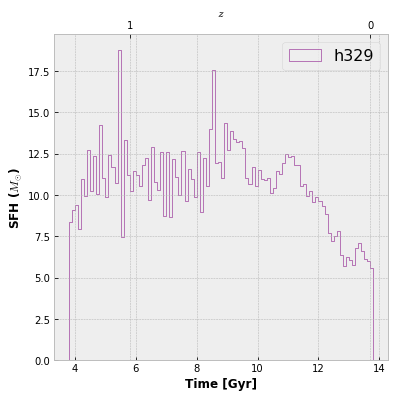

In [9]:
## Stars younger than 10 Gyr is about 4 Gyr and greater on the history of SF graph

fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_disk_older,bins=100, color='purple', label = 'h329')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFH ($M_{\odot}$)', fontweight='bold')
plt.tick_params(axis='both', which='major')

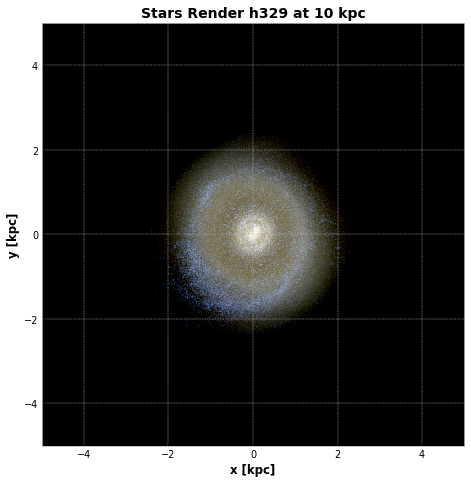

In [10]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '10 kpc')
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 at 10 kpc', fontweight='bold');

## Stellar Render Side-On Using h329 Disk with Filter

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/plot/stars.py:72: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


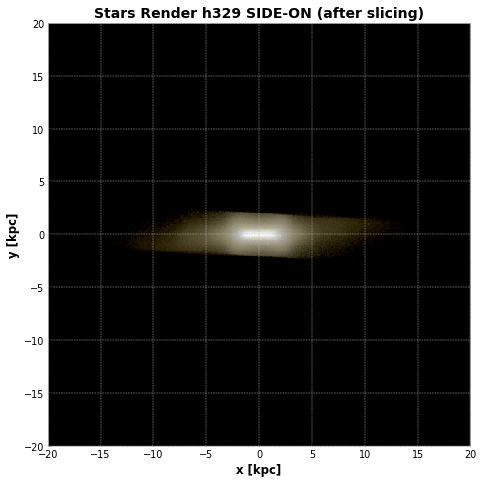

In [11]:
pynbody.analysis.angmom.sideon(h329_s_disk)

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '40 kpc', dynamic_range=5)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON (after slicing)', fontweight='bold')

pynbody.analysis.angmom.faceon(h329_s_disk);

## Profiles

### Radius Versus Stellar Mass

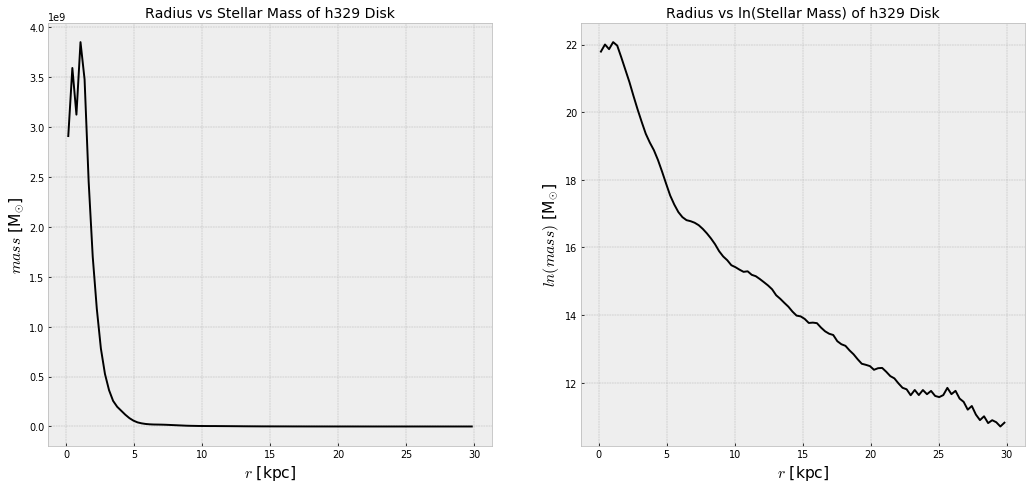

In [12]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass of h329 Disk')

axs[1].plot(h329_p_s_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_sliced['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) of h329 Disk');

### Z-Direction Versus Stellar Mass

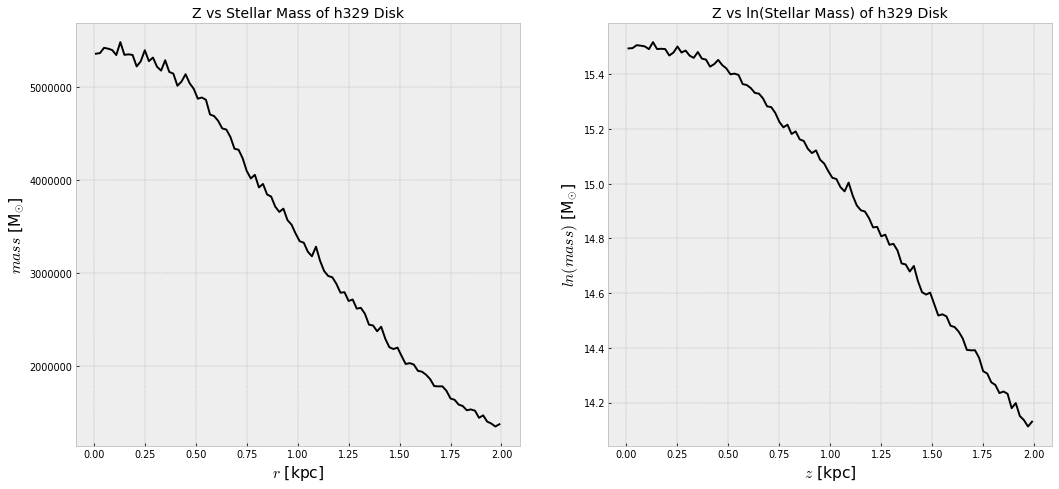

In [13]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_vert_sliced['rbins'].in_units('kpc'), h329_p_s_vert_sliced['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Z vs Stellar Mass of h329 Disk')

axs[1].plot(h329_p_s_vert_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_vert_sliced['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$z$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Z vs ln(Stellar Mass) of h329 Disk');

## Best Fits

### Best Fit for Radius versus ln(Stellar Mass): Linear Fit

In [14]:
## Defining a linear function
## my_x is the x axis (radius), my_m is the slope, and my_b is the additive constant

def linear(my_x, my_m, my_b):
    y = (my_m*my_x) + my_b
    return y

In [15]:
## We decided above that the best section to do a linear fit on would be from 5 to 20 kpc

## We can define a condition to isolate that section and make arrays specifically for 5-20 kpc
condition = np.logical_and(h329_p_s_sliced['rbins'].in_units('kpc') > 5, h329_p_s_sliced['rbins'].in_units('kpc') < 20)

## Here are the arrays for 5-20 kpc. We will use this in the fitting
my_x_rad = np.extract(condition, h329_p_s_sliced['rbins'].in_units('kpc'))
my_y_mass = np.extract(condition, np.log(h329_p_s_sliced['mass'].in_units('Msol')))

In [16]:
## I am using curve_fit function and defining the fit parameters as fitpars_lin and the error as error_lin
fitpars_lin, error_lin = curve_fit(linear, my_x_rad, my_y_mass)

## fitpars_lin returns our fit variables as (m, b) or (slope, additive constant)
fitpars_lin

array([-0.32732275, 18.91226365])

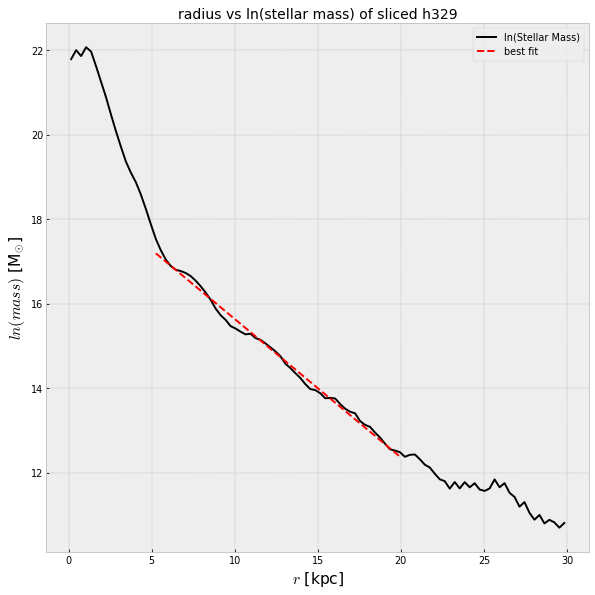

In [17]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_sliced['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad, linear(my_x_rad, *fitpars_lin), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad which was specifically the 5-20 kpc arrays we used to make the fit!!
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('radius vs ln(stellar mass) of sliced h329')
plt.legend();

In [18]:
## Let's see the error in the parameters for the value of m and b!

perr = np.sqrt(np.diag(error_lin))
perr

array([0.00385205, 0.0513055 ])

In [19]:
## Now we can find the scale length using the fitted line and variables

my_r_0 = -1 / fitpars_lin[0] ##fitpars_lin[0] is just the fitted m (slope) value

print(my_r_0)

3.055088633655907


### Best Fit for z vs Stellar Mass: Parabolic Fit

In [20]:
## Let's define our arrays that we will use so that we can call on simply my_z and my_mass in the fitting and graphs!

my_z = h329_p_s_vert_sliced['rbins'].in_units('kpc')
my_mass = np.log(h329_p_s_vert_sliced['mass'].in_units('Msol'))

In [21]:
## z_var is the z-axis array, my_p2 represents the term in front of z^2 in the polynomial, and my_const is the additive constant
def quad_cen(z_var, my_p2, my_const):
    y = (my_p2 *(z_var**2)) + my_const ## See description above for explanation of where this function comes from!
    return y

In [22]:
## Similar to before I am defining fitpars_quad for the quadratic fit variables and the error in those values as error_quad

fitpars_quad, error_quad = curve_fit(quad_cen, my_z, my_mass)

print(fitpars_quad)

[-0.3750808 15.4656231]


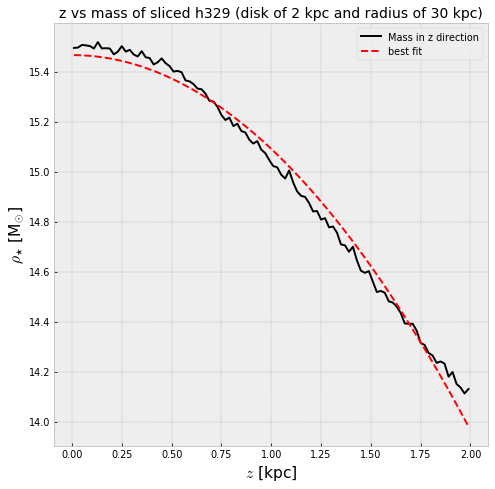

In [23]:
## Let's graph the parabolic fit!

fig = plt.figure(figsize=[8, 8], dpi=70)

plt.plot(my_z, np.log(h329_p_s_vert_sliced['mass'].in_units('Msol')),'k', label='Mass in z direction') 
plt.plot(my_z, quad_cen(my_z, *fitpars_quad), linestyle='--', color='r', label='best fit' )
plt.xlabel('$z$ [kpc]', fontsize=16)
plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$]', fontsize=16)
plt.title('z vs mass of sliced h329 (disk of 2 kpc and radius of 30 kpc)')
plt.legend();

In [24]:
## The scale height value - see how this was defined in description above!

my_z0_2 = np.sqrt(-1/fitpars_quad[0])
my_z0_2

1.6328172634139044

### Best Fit for z Versus Stellar Mass: Hyperbolic sech^2 Fit

In [25]:
## Let's define our new function! my_z_new is the z axis array and my_amp is the additive constant
def sech2(my_z_new, my_z0_new, my_amp):
    y = ((np.cosh(my_z_new*my_z0_new))**(-2))*my_amp
    return y

In [26]:
## Defining our fit variables!
fitpars_sech2, error_sech2 = curve_fit(sech2, my_z, (h329_p_s_vert_sliced['mass'].in_units('Msol'))) ## we don't use np.log in this one!

## fitpars_sech2 gives (my_z0_new, my_amp) so (z0, additive constant)
fitpars_sech2

array([6.95020976e-01, 5.45299829e+06])

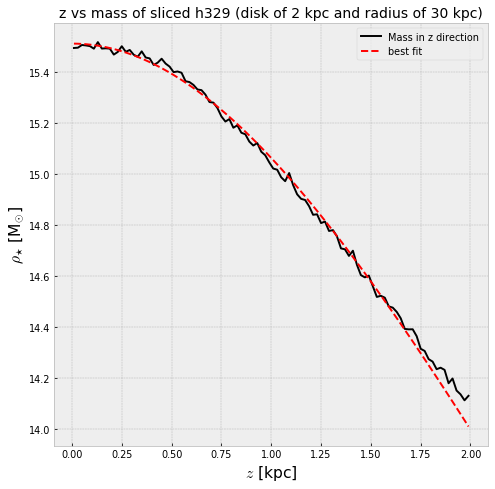

In [27]:
## Graphing our sech^2 fit along with our original z verus stellar mass data

fig = plt.figure(figsize=[8, 8], dpi=70)

plt.plot(my_z, np.log(h329_p_s_vert_sliced['mass'].in_units('Msol')),'k', label='Mass in z direction') 
plt.plot(my_z, np.log(sech2(my_z, *fitpars_sech2)), linestyle='--', color='r', label='best fit' )
plt.xlabel('$z$ [kpc]', fontsize=16)
plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$]', fontsize=16)
plt.title('z vs mass of sliced h329 (disk of 2 kpc and radius of 30 kpc)')
plt.legend();

In [28]:
## Now let's look at our new estimate for the scale height!!
my_z0_new = -1/(fitpars_sech2[0])
my_z0_new

-1.4388054966812867

The negative sign in these results doesn't matter due to the definition of the function and it's symmetry over the y-axis.